In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [27]:
# UCI DryBean
# independent variable (X) : 13~16 : Shape Factor (SF1, SF2, SF3, SF4)
# dependent variable (y) : class

# DNN Classifier 적용

In [28]:
data = pd.read_csv('Dry_Bean_Dataset.csv', encoding='cp949')

X = data.iloc[:, 12:16]

# print(X)

y = data.iloc[:, -1]

enc = LabelEncoder()
y = enc.fit(y).transform(y)

# print(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

print(X_train.shape)

(10208, 4)


Epoch 1/50
319/319 [==============================] - 1s 665us/step - loss: 1.2004 - accuracy: 0.5342
Epoch 2/50
319/319 [==============================] - 0s 645us/step - loss: 1.0695 - accuracy: 0.5904
Epoch 3/50
319/319 [==============================] - 0s 662us/step - loss: 1.0605 - accuracy: 0.5910
Epoch 4/50
319/319 [==============================] - 0s 703us/step - loss: 1.0449 - accuracy: 0.5926
Epoch 5/50
319/319 [==============================] - 0s 649us/step - loss: 1.0430 - accuracy: 0.5941
Epoch 6/50
319/319 [==============================] - 0s 643us/step - loss: 1.0258 - accuracy: 0.6050
Epoch 7/50
319/319 [==============================] - 0s 638us/step - loss: 1.0187 - accuracy: 0.6055
Epoch 8/50
319/319 [==============================] - 0s 640us/step - loss: 1.0145 - accuracy: 0.6044
Epoch 9/50
319/319 [==============================] - 0s 640us/step - loss: 0.9908 - accuracy: 0.6136
Epoch 10/50
319/319 [==============================] - 0s 634us/step - loss: 0.842

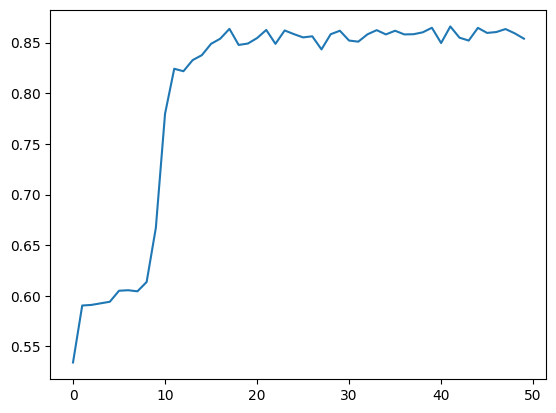

In [29]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=[4,]),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(7)  # target의 개수
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # 분류기는 accuracy를 확인

h = model.fit(X_train, y_train, epochs=50)

_, axe = plt.subplots()

axe.plot(h.history['accuracy'])

In [30]:
# 다른 풀이

data = pd.read_csv('Dry_Bean_Dataset.csv', encoding='cp949')

print(data)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation   
0      28395    610.291       208.178117       173.888747      1.197191  \
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness   
0          0.54981

In [31]:
X = data[['ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']]
y = data['Class'].astype('category').cat.codes

# print(X)
# print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)
print(X_train.shape)

print(y.unique())

(10208, 4)
[5 0 1 2 4 6 3]


In [32]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(4,)),
  keras.layers.Dense(12, activation='relu'),
  keras.layers.Dense(7)
])

model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # optimizer = 'adam',
              optimizer = keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 12)                60        
                                                                 
 dense_18 (Dense)            (None, 7)                 91        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [33]:
h = model.fit(X_train, y_train, epochs=150)

Epoch 1/150
319/319 [==============================] - 0s 602us/step - loss: 1.6955 - accuracy: 0.3509
Epoch 2/150
319/319 [==============================] - 0s 621us/step - loss: 1.2967 - accuracy: 0.5311
Epoch 3/150
319/319 [==============================] - 0s 646us/step - loss: 1.1402 - accuracy: 0.5709
Epoch 4/150
319/319 [==============================] - 0s 597us/step - loss: 1.0859 - accuracy: 0.5894
Epoch 5/150
319/319 [==============================] - 0s 583us/step - loss: 1.0621 - accuracy: 0.5939
Epoch 6/150
319/319 [==============================] - 0s 586us/step - loss: 1.0454 - accuracy: 0.6034
Epoch 7/150
319/319 [==============================] - 0s 577us/step - loss: 1.0316 - accuracy: 0.6056
Epoch 8/150
319/319 [==============================] - 0s 577us/step - loss: 1.0237 - accuracy: 0.6082
Epoch 9/150
319/319 [==============================] - 0s 580us/step - loss: 1.0117 - accuracy: 0.6100
Epoch 10/150
319/319 [==============================] - 0s 577us/step - l

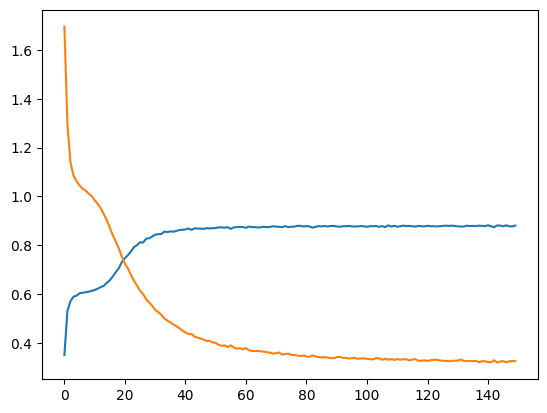

In [35]:
# print(h.history['accuracy'])
_, axe = plt.subplots()
axe.plot(h.history['accuracy'])
axe.plot(h.history['loss'])

In [37]:
# model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

107/107 [==============================] - 0s 623us/step - loss: 0.3454 - accuracy: 0.8748


[0.34538188576698303, 0.874816358089447]